<a href="https://colab.research.google.com/github/aisha74/credit_scoring/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22EDA_credit_scoring_template_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Банковская просрочка по кредиту

Датасет содержит информацию о клиентах некоторого банка.  
Ваша задача состоит в том, чтобы по различным характеристикам клиентов спрогнозировать целевую переменную - имел клиент просрочку 90 и более дней или нет (и если имел, то банк не будет выдавать кредит этому клиенту, а иначе будет)

##Импорт библиотек, константы

In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix




In [247]:
RANDOM_STATE = 42

In [249]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/stepik_from_idea_to_mvp/main/datasets/credit_scoring.csv"

## Загрузка и обзор данных

### Загрузка

In [250]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
- `SeriousDlqin2yrs`: клиент имел просрочку 90 и более дней

**Признаки**
- `RevolvingUtilizationOfUnsecuredLines`: общий баланс средств (total balance on credit cards and personal lines of credit except real estate and no installment debt
like car loans divided by the sum of credit limits)
- `age`: возраст заемщика
- `NumberOfTime30-59DaysPastDueNotWorse`: сколько раз за последние 2 года наблюдалась просрочка 30-59 дней
- `DebtRatio`: ежемесячные расходы (платеж по долгам, алиментам, расходы на проживания) деленные на месячный доход
- `MonthlyIncome`: ежемесячный доход
- `NumberOfOpenCreditLinesAndLoans`: количество открытых кредитов (напрмер, автокредит или ипотека) и кредитных карт
- `NumberOfTimes90DaysLate`: сколько раз наблюдалась просрочка (90 и более дней)
- `RealEstateLoansOrLines`: закодированное количество кредиов (в том числе под залог жилья) - чем больше код буквы, тем больше кредитов
- `NumberOfTime60-89DaysPastDueNotWorse`: сколько раз за последние 2 года заемщик задержал платеж на 60-89 дней
- `NumberOfDependents`: количество иждивенцев на попечении (супруги, дети и др)
- `GroupAge`: закодированная возрастная группа - чем больше код, тем больше возраст

##Предварительный анализ данных

###Общая информация о данных

In [251]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   135155 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    146076 non-null  float64
 10  RealEstateLoansOrLines                150000 non-null  object 
 11  

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,135155.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.293618,0.421033,353.005076,6.670221e+03,8.452760,0.265973,0.240387,0.757222
std,0.249746,249.755371,14.772577,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,98.000000,20.000000


###Проверка на наличие пропусков

In [252]:
df.isnull().sum()

,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,14845
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberOfTime60-89DaysPastDueNotWorse,0
NumberOfDependents,3924


#### Заполнение пропущенных значений в столбцах средним значением

In [253]:
df['age'] = df['age'].fillna(df['age'].mean())
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean())
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(df['NumberOfDependents'].mean())


###Замена типа данных

In [254]:
df['RevolvingUtilizationOfUnsecuredLines'] = df['RevolvingUtilizationOfUnsecuredLines'].astype('int')
df['age'] = df['age'].astype('int')
df['DebtRatio'] = df['DebtRatio'].astype('int')
df['MonthlyIncome'] = df['MonthlyIncome'].astype('int')
df['NumberOfDependents'] = df['NumberOfDependents'].astype('int')

In [255]:
df.isnull().sum()

,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberOfTime60-89DaysPastDueNotWorse,0
NumberOfDependents,0


###Проверка типов данных

In [256]:
df.dtypes

,0
SeriousDlqin2yrs,int64
RevolvingUtilizationOfUnsecuredLines,int64
age,int64
NumberOfTime30-59DaysPastDueNotWorse,int64
DebtRatio,int64
MonthlyIncome,int64
NumberOfOpenCreditLinesAndLoans,int64
NumberOfTimes90DaysLate,int64
NumberOfTime60-89DaysPastDueNotWorse,int64
NumberOfDependents,int64


## Визуализация данных
###Гистограммы распределений

### Построение гистограмм для признаков

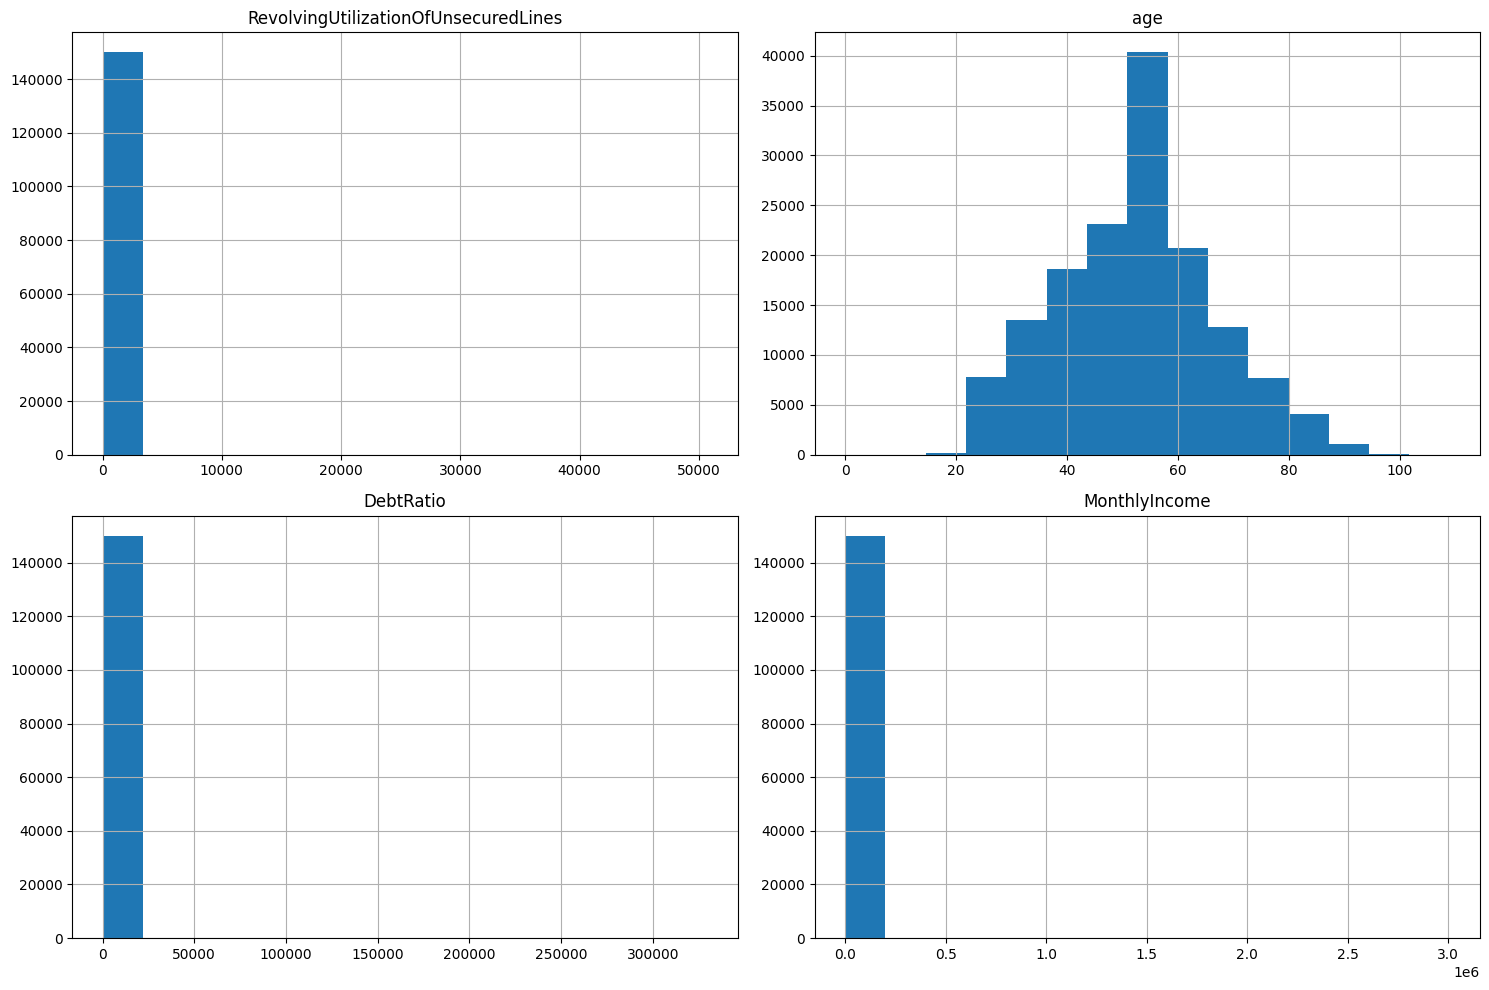

In [257]:
features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome']
df[features].hist(bins=15, figsize=(15, 10), layout=(2, 2))
plt.tight_layout()
plt.show()

###Коробочные диаграммы

### Коробочные диаграммы для выявления выбросов

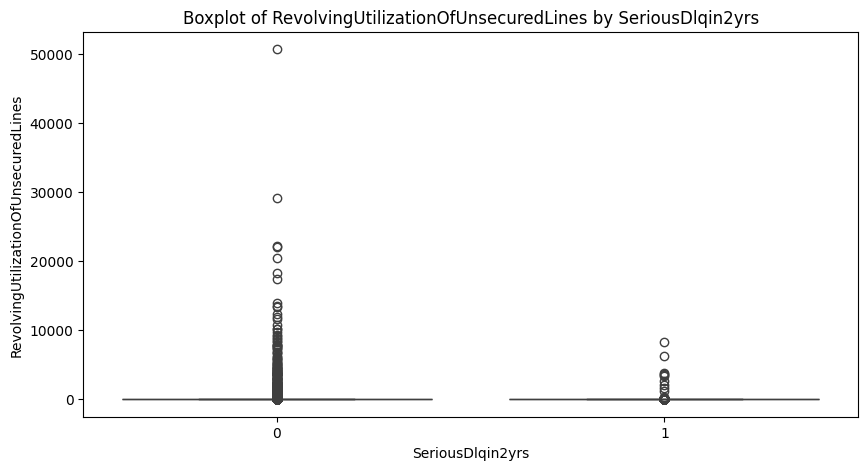

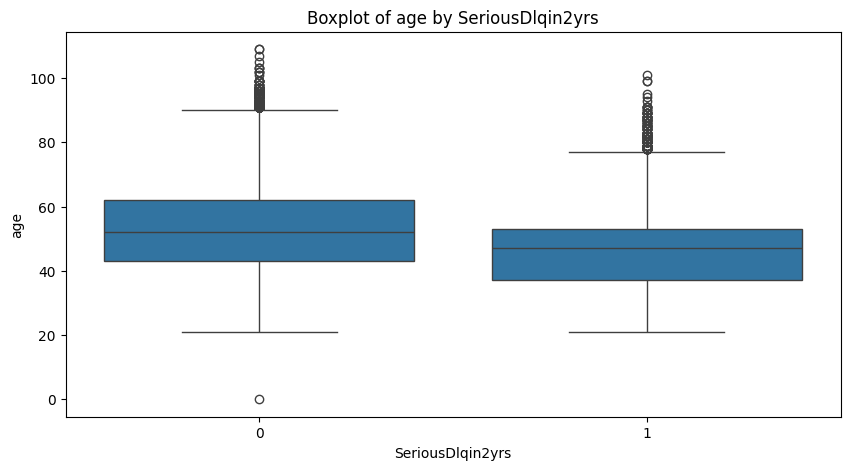

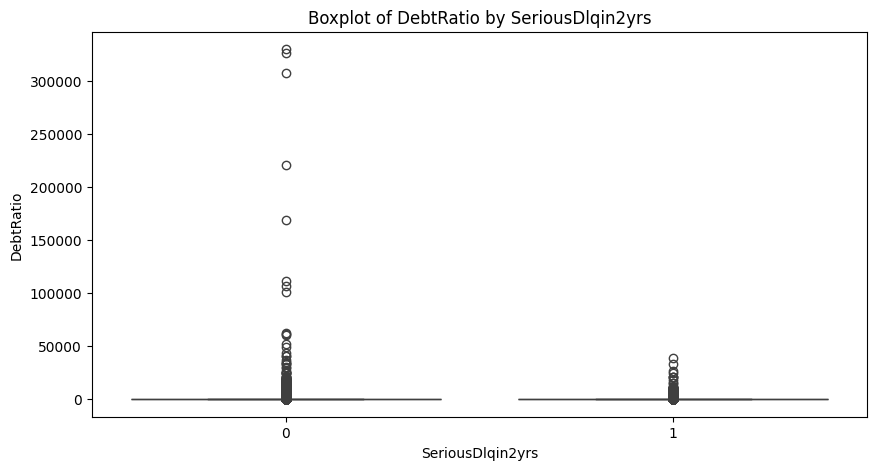

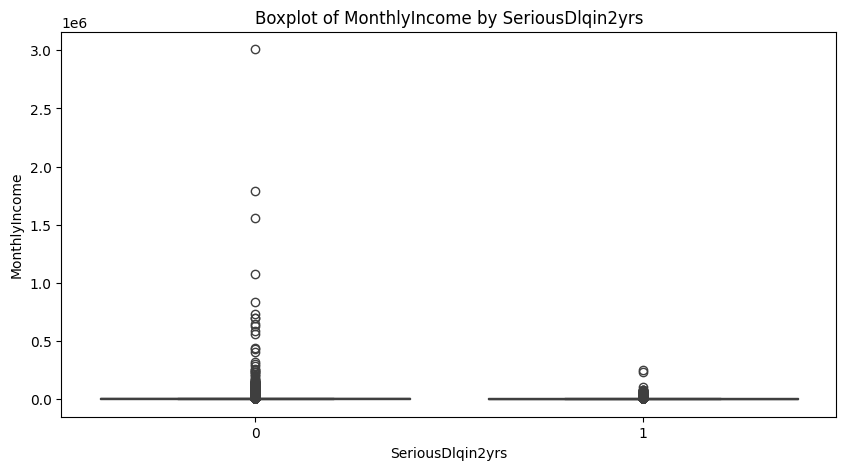

In [258]:
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='SeriousDlqin2yrs', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by SeriousDlqin2yrs')
    plt.show()

###Диаграмма рассеяния

#### Диаграмма рассеяния для Monthly Income и Revolving Utilization

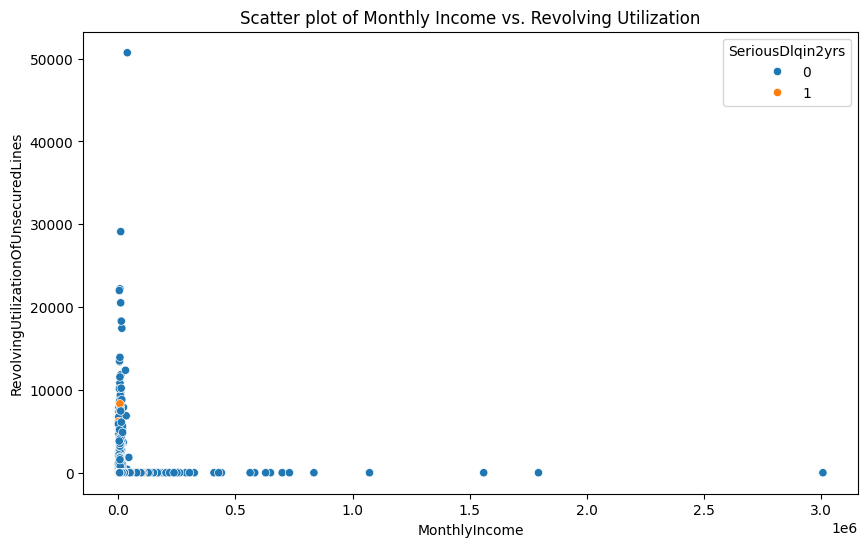

In [259]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyIncome', y='RevolvingUtilizationOfUnsecuredLines', hue='SeriousDlqin2yrs', data=df)
plt.title('Scatter plot of Monthly Income vs. Revolving Utilization')
plt.show()

## Подготовка данных для модели

###  Разделение данных на обучающую и тестовую выборки

In [260]:
X = df.drop(columns=['SeriousDlqin2yrs'])
y = df['SeriousDlqin2yrs']

In [261]:
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
0,0,43,0,0,3280,7,0,0,2,A,c
1,0,25,0,0,333,2,0,0,0,A,b
2,0,38,0,0,3000,7,0,0,2,A,c
3,0,32,0,0,7916,6,0,0,0,A,b
4,0,58,0,0,2416,9,0,0,0,A,d


In [262]:
X.drop(['RealEstateLoansOrLines', 'GroupAge'], axis=1, inplace=True)

In [263]:
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,43,0,0,3280,7,0,0,2
1,0,25,0,0,333,2,0,0,0
2,0,38,0,0,3000,7,0,0,2
3,0,32,0,0,7916,6,0,0,0
4,0,58,0,0,2416,9,0,0,0


###  Разделение на обучающую и тестовую выборки

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((120000, 9), (30000, 9))

In [266]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [267]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[27931,    31],
       [ 2010,    28]])

### Прогнозирование

In [268]:
y_pred_log = model.predict(X_test)

### Оценка модели

In [269]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.9319666666666667

In [270]:
y_test.value_counts()

,count
SeriousDlqin2yrs,
0,27962
1,2038


In [271]:
from sklearn.metrics import recall_score

recall_score(y_test, pred) # 27/33

0.013738959764474975

In [272]:
from sklearn.metrics import precision_score

precision_score(y_test, pred) # 27/31

0.4745762711864407

In [273]:
probs = model.predict_proba(X_test)

probs[:5]

array([[0.98362016, 0.01637984],
       [0.96538238, 0.03461762],
       [0.95335364, 0.04664636],
       [0.97601825, 0.02398175],
       [0.9411279 , 0.0588721 ]])

In [274]:
classes = probs[:,1] > 0.5

classes[:5]

array([False, False, False, False, False])

In [275]:
confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[27931,    31],
        [ 2010,    28]]),
 0.013738959764474975)

In [279]:
classes = probs[:,1] > 0.0000000001

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[    5, 27957],
        [    0,  2038]]),
 1.0)

In [280]:
model.coef_

array([[-7.39928322e-04, -4.48678772e-02,  3.85008317e-01,
        -3.19145936e-05, -7.84092282e-05, -1.33400699e-02,
         7.92060616e-02, -4.39285714e-01,  2.35562319e-01]])

In [281]:
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_log))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_log))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     27962
           1       0.47      0.01      0.03      2038

    accuracy                           0.93     30000
   macro avg       0.70      0.51      0.50     30000
weighted avg       0.90      0.93      0.90     30000

Confusion Matrix:
[[27931    31]
 [ 2010    28]]


##Масштабирование признаков

In [282]:
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
104025,0,53,0,0,19200,9,0,0,1
5415,0,44,0,0,6500,4,0,0,3
75612,0,67,0,1076,6670,9,0,0,0
138169,0,52,0,0,11420,14,0,0,3
87184,0,51,0,0,5923,5,0,0,0


In [283]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
ss.fit(X_train) # вычислить min, max по каждому столбцу

X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,0.486239,0.0,0.000000,0.006381,0.155172,0.0,0.0,0.05
1,0.0,0.403670,0.0,0.000000,0.002160,0.068966,0.0,0.0,0.15
2,0.0,0.614679,0.0,0.003505,0.002217,0.155172,0.0,0.0,0.00
3,0.0,0.477064,0.0,0.000000,0.003796,0.241379,0.0,0.0,0.15
4,0.0,0.467890,0.0,0.000000,0.001969,0.086207,0.0,0.0,0.00


##Оценка важности признаков

In [284]:
model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [285]:
pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

###Веса модели

In [286]:
model.coef_, model.intercept_

(array([[ -0.59420605,  -3.33896083,  12.71241817,  -0.25186264,
          -1.58445045,  -0.50095064,   3.39761354, -12.93148742,
           2.09966813]]),
 array([-1.18353139]))

##Кодирование категориальных признаков

In [287]:
X = df.drop(['SeriousDlqin2yrs'], axis=1)

y = df['SeriousDlqin2yrs']

In [288]:
X.dtypes

,0
RevolvingUtilizationOfUnsecuredLines,int64
age,int64
NumberOfTime30-59DaysPastDueNotWorse,int64
DebtRatio,int64
MonthlyIncome,int64
NumberOfOpenCreditLinesAndLoans,int64
NumberOfTimes90DaysLate,int64
NumberOfTime60-89DaysPastDueNotWorse,int64
NumberOfDependents,int64
RealEstateLoansOrLines,object


In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##Предобработаем признаки:

-закодируем категориальные признаки

-масштабируем числовые признаки

In [290]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical = ['RealEstateLoansOrLines', 'GroupAge']
numeric_features = [col for col in X_train.columns if col not in categorical]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

In [291]:
X_train_transformed

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.05]])

###Добавим названия колонок

In [292]:
lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_features)

X_train_transformed = pd.DataFrame(X_train_transformed, columns=lst)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=lst)

X_train_transformed.head()

,RealEstateLoansOrLines_B,RealEstateLoansOrLines_C,RealEstateLoansOrLines_D,RealEstateLoansOrLines_E,GroupAge_b,GroupAge_c,GroupAge_d,GroupAge_e,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.568807,0.000000,0.010052,0.002217,0.241379,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.458716,0.000000,0.000000,0.000665,0.086207,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.605505,0.000000,0.000000,0.004653,0.120690,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.431193,0.010204,0.000000,0.000774,0.172414,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.266055,0.000000,0.000000,0.000665,0.068966,0.0,0.0,0.0


In [293]:
model = LogisticRegression()

model.fit(X_train_transformed, y_train)

pred = model.predict_proba(X_test_transformed)[:,1]

In [294]:
classes = pred > 0.5

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[34905,    28],
        [ 2527,    40]]),
 0.015582391897156213)

In [295]:
classes = pred > 0.01

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[    2, 34931],
        [    0,  2567]]),
 1.0)

In [296]:
importances = pd.DataFrame({'weights': model.coef_[0], 'features': X_train_transformed.columns}).sort_values(by='weights')
importances

,weights,features
15,-11.394054,NumberOfTime60-89DaysPastDueNotWorse
9,-3.649908,age
12,-1.722273,MonthlyIncome
13,-1.021596,NumberOfOpenCreditLinesAndLoans
11,-0.759577,DebtRatio
8,-0.651702,RevolvingUtilizationOfUnsecuredLines
4,-0.142090,GroupAge_b
5,-0.006413,GroupAge_c
7,0.003683,GroupAge_e
6,0.087798,GroupAge_d


##Сохранение модели

In [297]:
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

#а так модель можно загрузить из файла:
with open('model.pickle', 'rb') as f:
    model = pickle.load(f)